In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6427031 .csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6486029.csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6607011.csv')
df = pd.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/logs.csv')

/Users/wiggles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Our goal is to find a weak spot in the game that would expl

In [3]:
dfByPlayer = []
for i in set(df['player_id']):
    dfByPlayer.append(df[df['player_id'] == i])



In [4]:
wordchoice = []
for i in dfByPlayer:
    wordchoice.append(set(i['new_label']))

In [5]:
w = []
for i in wordchoice:
    w.append([x for x in i if type(x) == str])

In [6]:
w

[['my kid',
  'generous',
  'cool',
  'regular family',
  'beaches',
  'rapping',
  'happy',
  'strength',
  'goin out',
  'dog',
  'musician',
  'drugs',
  'rapper',
  'driving around',
  'education',
  'bike riding',
  'my cousin',
  'my wife',
  'SUV',
  'music',
  'family',
  'playing ball',
  'lawyer',
  'puerto rico'],
 ['werid'],
 ['my dad is impo', 'my dad', 'nice car', 'be a polec'],
 ['cookie', 'engeneer', 'baby', 'constru', 'math'],
 ['silly',
  'love movies',
  'hyper',
  'us navy',
  'grandparents',
  'love music',
  'New York',
  'Social Studies',
  'football',
  'parents',
  'k9',
  'caring',
  'gamer',
  'gaming',
  'drugs',
  'reading',
  'saxophone',
  'some where fun',
  'army',
  'technolgy',
  'toyotas',
  'a family of 4',
  'to be strong',
  'nasacar',
  'toyota',
  'florida',
  'L.A'],
 ['mean', 'gamer', 'hard worker', 'joker', 'accomplishing'],
 ['music',
  'good',
  'maxwell',
  'basketball',
  'movies',
  'hypercar',
  'awesome',
  'art and draw'],
 ['i love m

In [7]:
mask = []
for i in w:
    if len(i) <= 0:
        mask.append(False)
    else:
        mask.append(True)
    

In [13]:
trueIndices = []
for i in range(len(mask)):
    if mask[i]:
        trueIndices.append(i)

trueIndicesNonValid = [16, 29, 33, 42, 98, 100]
nonValid = []
for i in trueIndicesNonValid:
    nonValid.append(trueIndices[i])

# nonValid
for i in nonValid:
    mask[i] = not mask[i]

# nonValid
# 26 45 49 62 137 139
mask

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [14]:
caregroup = []
notcaregroup = []
for i in range(len(mask)):
    if(mask[i] == True):
        caregroup.append(dfByPlayer[i])
    else:
        notcaregroup.append(dfByPlayer[i])

In [15]:
caregroup_u16 = []
for i in range(len(caregroup)):
    if caregroup[i]['event_time_dbl'].max() <= 57600:
        caregroup_u16.append(caregroup[i])


notcaregroup_u16 = []
for i in range(len(notcaregroup)):
    if notcaregroup[i]['event_time_dbl'].max() <= 57600:
        notcaregroup_u16.append(notcaregroup[i])

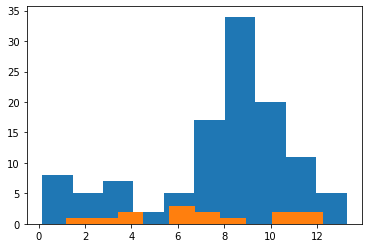

In [16]:
def hour_histogram(care_group): 
    total_hours = []
    for i in care_group:
        total_hours.append(i['event_time_dbl'].max()/3600)
    plt.hist(total_hours)

hour_histogram(caregroup_u16)
hour_histogram(notcaregroup_u16)

In [17]:
caregroup = caregroup_u16
notcaregroup = notcaregroup_u16

In [18]:
totaltime = 0
for i in caregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(caregroup))

28165.85087719298


In [19]:
totaltime = 0
for i in notcaregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(notcaregroup))

25360.0


In [20]:
totalminigametimelist = []
for i in notcaregroup:
    startflag = False
    start = 0
    stop = 0
    totalminigametime = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


In [21]:
def stats_summary(a):
    print ("The 20th perecentile is " + str(np.round(np.nanpercentile(a, 20),2)))
    print ("The mean is " + str(np.round(np.nanmean(a),2)))
    print ("The median is " + str(np.round(np.nanmedian(a),2)))
    print ("The 80th percentile is " + str(np.round(np.nanpercentile(a, 80),2)))
    print ("The standard deviation is " + str(np.round(np.nanstd(a),2)))

In [22]:
stats_summary(totalminigametimelist)

The 20th perecentile is 0.22
The mean is 0.26
The median is 0.26
The 80th percentile is 0.29
The standard deviation is 0.04


<AxesSubplot:ylabel='Probability'>

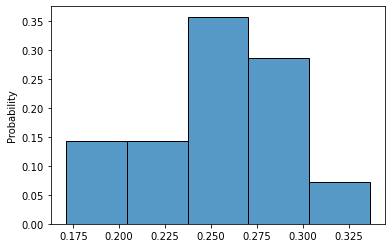

In [23]:
sns.histplot(
    x=totalminigametimelist,
    stat='probability'
)

In [24]:
totalminigametimelist = []
for i in caregroup:
    totalminigametime = 0
    startflag = False
    start = 0
    stop = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


In [25]:
stats_summary(totalminigametimelist)

The 20th perecentile is 0.21
The mean is 0.25
The median is 0.25
The 80th percentile is 0.29
The standard deviation is 0.06


<AxesSubplot:ylabel='Probability'>

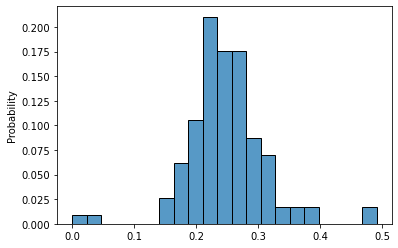

In [26]:
sns.histplot(
    x=totalminigametimelist,
    stat='probability'
)

In [27]:
totalminigametimelist = []
for i in caregroup:
    totalminigametime = 0
    startflag = False
    start = 0
    stop = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Challenge Stack")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Challenge Stack")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


In [28]:
challengestackcare = totalminigametimelist

<AxesSubplot:ylabel='Probability'>

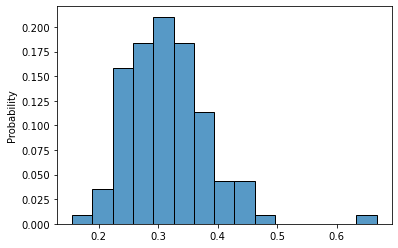

In [29]:
sns.histplot(
    x= challengestackcare,
    stat='probability'
)

In [30]:
stats_summary(totalminigametimelist)

The 20th perecentile is 0.26
The mean is 0.31
The median is 0.31
The 80th percentile is 0.36
The standard deviation is 0.07


In [31]:
totalminigametimelist = []
for i in notcaregroup:
    totalminigametime = 0
    startflag = False
    start = 0
    stop = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Challenge Stack")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Challenge Stack")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime/(i['event_time_dbl'].max()))


In [32]:
challengestacknotcare = totalminigametimelist


<AxesSubplot:ylabel='Probability'>

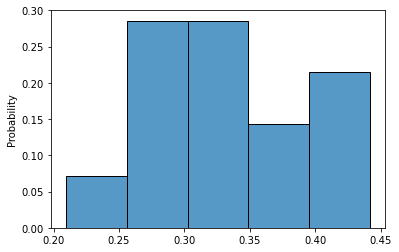

In [33]:
sns.histplot(
    x= challengestacknotcare,
    stat='probability'
)

In [34]:
stats.ttest_ind(challengestackcare, challengestacknotcare, equal_var= False)

Ttest_indResult(statistic=-0.6235832376060971, pvalue=0.5413694312783159)

In [35]:
stats_summary(totalminigametimelist)

The 20th perecentile is 0.28
The mean is 0.33
The median is 0.31
The 80th percentile is 0.39
The standard deviation is 0.06


<AxesSubplot:ylabel='Probability'>

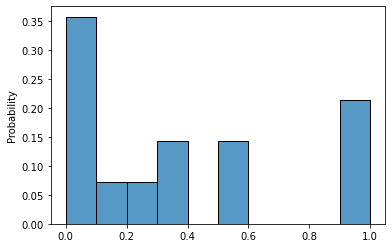

In [36]:
graph = []
for i in notcaregroup:
    graph.append(i['proportion_complete'].max())
sns.histplot(
    x=graph,
    stat='probability',
    bins = 10
)


<AxesSubplot:ylabel='Probability'>

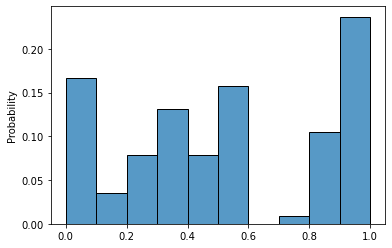

In [37]:
graph = []
for i in caregroup:
    graph.append(i['proportion_complete'].max())
sns.histplot(
    x=graph,
    stat='probability',
    bins = 10
)


[[1.         0.03835896]
 [0.03835896 1.        ]]


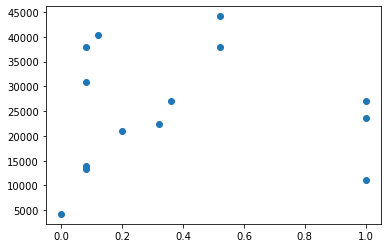

In [38]:
x = []
y = []
for i in notcaregroup:
   x.append(i['proportion_complete'].max())
   y.append(i['event_time_dbl'].max())
plt.scatter(x,y)
print(np.corrcoef(x, y))

[[1.        0.5196857]
 [0.5196857 1.       ]]


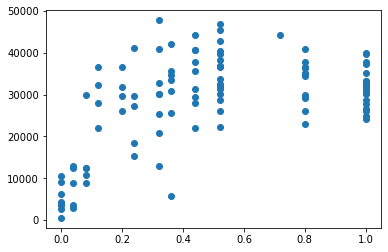

In [39]:
x = []
y = []
for i in caregroup:
   x.append(i['proportion_complete'].max())
   y.append(i['event_time_dbl'].max())
plt.scatter(x,y)
print(np.corrcoef(x, y))

In [77]:
llist = []
for i in caregroup:
    try:
        llist.append(i['proportion_complete'][i['proportion_complete'].last_valid_index()])
    except KeyError:
        print('NA')

[10.0, 6.0, 11.0, 5.0, 11.0, 4.0, 8.0, 0.0, 6.0, 0.0, 1.0, 5.0, 10.0, 11.0]


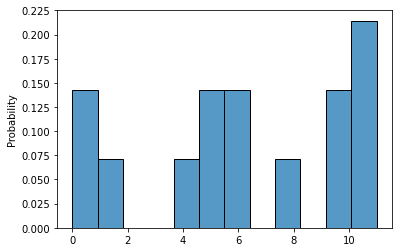

In [86]:
sns.histplot(
    x= llist,
    stat='probability',
    bins = 12
)
print(llist)

In [80]:
llist = []
for i in caregroup:
    try:
        llist.append(i['stack_id'][i['stack_id'].last_valid_index()])
    except KeyError:
        print('NA')

[4.0, 11.0, 0.0, 11.0, 0.0, 11.0, 11.0, 10.0, 11.0, 11.0, 10.0, 11.0, 11.0, 5.0, 0.0, 4.0, 11.0, 8.0, 6.0, 0.0, 10.0, 5.0, 7.0, 7.0, 8.0, 6.0, 11.0, 1.0, 6.0, 8.0, 0.0, 6.0, 8.0, 7.0, 8.0, 11.0, 11.0, 10.0, 11.0, 6.0, 9.0, 11.0, 11.0, 11.0, 11.0, 0.0, 11.0, 6.0, 1.0, 2.0, 11.0, 10.0, 10.0, 6.0, 7.0, 6.0, 0.0, 4.0, 0.0, 11.0, 11.0, 11.0, 11.0, 8.0, 5.0, 2.0, 7.0, 11.0, 1.0, 11.0, 0.0, 11.0, 0.0, 5.0, 0.0, 11.0, 11.0, 6.0, 3.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 5.0, 11.0, 6.0, 7.0, 1.0, 4.0, 0.0, 11.0, 1.0, 8.0, 7.0, 6.0, 6.0, 6.0, 11.0, 6.0, 9.0, 1.0, 11.0, 11.0, 11.0, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 8.0, 11.0]


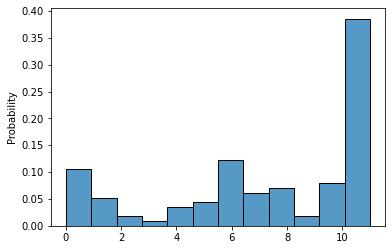

In [82]:
sns.histplot(
    x= llist,
    stat='probability',
    bins = 12
)
print(llist)

In [83]:
llist = []
for i in notcaregroup:
    try:
        llist.append(i['stack_id'][i['stack_id'].last_valid_index()])
    except KeyError:
        print('NA')

[10.0, 6.0, 11.0, 5.0, 11.0, 4.0, 8.0, 0.0, 6.0, 0.0, 1.0, 5.0, 10.0, 11.0]


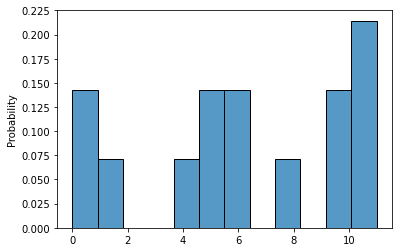

In [84]:
sns.histplot(
    x= llist,
    stat='probability',
    bins = 12
)
print(llist)